#Data Analysis With Python-Flight Delay and Cancellation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


There are 3 csv files in the datasets.so reading all one by one


1.  df1=Flight
2. df2=Airports
3. df3=Airlines

#Read Data from Google Drive

In [ ]:
file_path='/content/drive/My Drive/Datasets/flights.csv'
df1=pd.read_csv(file_path)
df1.head()

<ipython-input-3-fbd4c4abbe76>:2: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df1=pd.read_csv(file_path)


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [ ]:
df1.isna().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14367
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           83814
DEPARTURE_DELAY          83814
TAXI_OUT                 86612
WHEELS_OFF               86612
SCHEDULED_TIME               6
ELAPSED_TIME            101784
AIR_TIME                101784
DISTANCE                     0
WHEELS_ON                89942
TAXI_IN                  89942
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             89942
ARRIVAL_DELAY           101784
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5245484
AIR_SYSTEM_DELAY       4329554
SECURITY_DELAY         4329554
AIRLINE_DELAY          4329554
LATE_AIRCRAFT_DELAY    4329554
WEATHER_DELAY          4329554
ORIGIN AIRPORT               0
dtype: i

<Axes: >

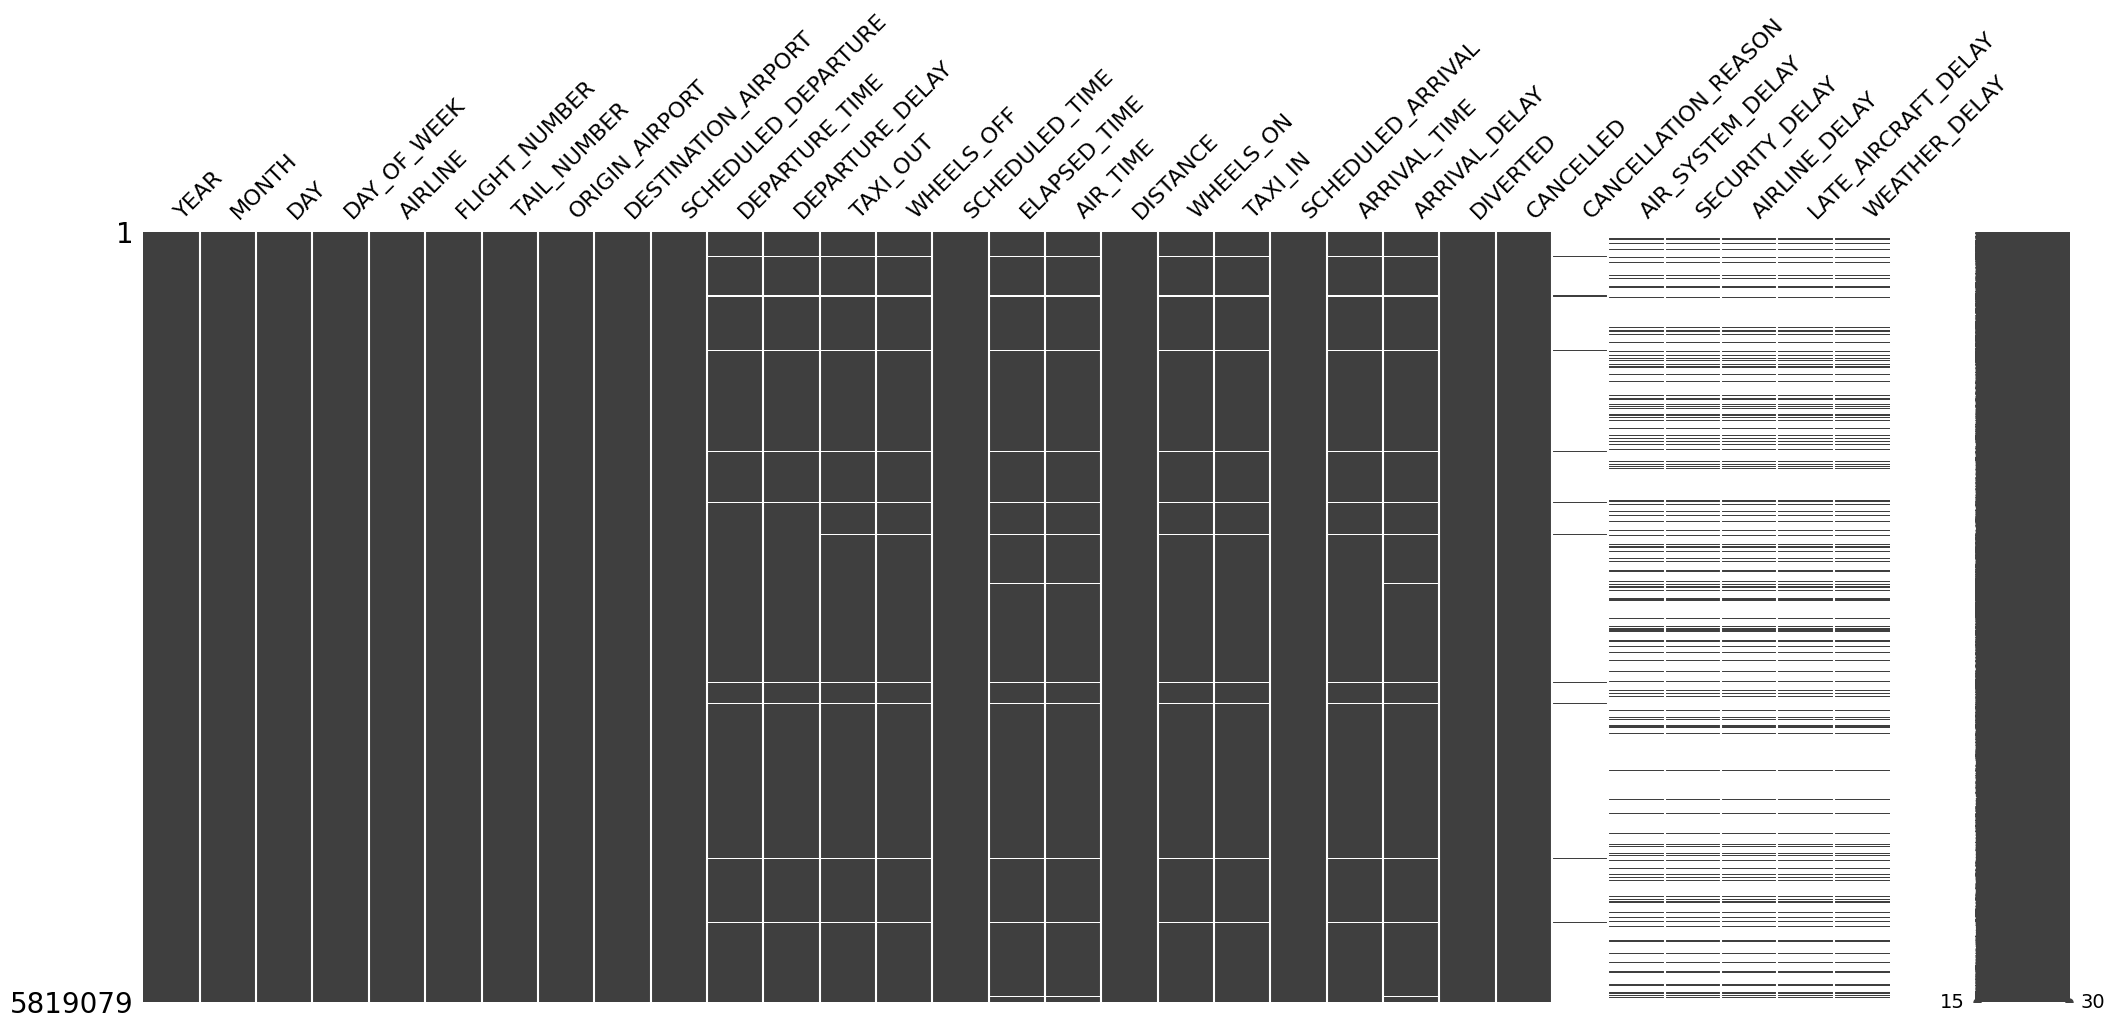

In [ ]:
#Using missingno lib to check missing values
import missingno as msno
msno.matrix(df1)

In [ ]:
df1.duplicated().sum()

0

In [ ]:
#Reading dataframe 2 (Airports Data)
file_path='/content/drive/My Drive/Datasets/airports.csv'
df2=pd.read_csv(file_path)
df2.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [ ]:
df6 = df2[df2['IATA_CODE'] == 'ORD']
df6

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
228,ORD,Chicago O'Hare International Airport,Chicago,IL,USA,41.9796,-87.90446


In [ ]:
#data frame 3 (Airlines Data)
file_path='/content/drive/My Drive/Datasets/airlines.csv'
df3=pd.read_csv(file_path)
df3.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   IATA_CODE  14 non-null     object
 1   AIRLINE    14 non-null     object
dtypes: object(2)
memory usage: 352.0+ bytes


# Q-01
Question: Which airline had the highest percentage of delayed or cancelled flights in 2015?


In [ ]:
# Filter the flights dataset to only include flights from 2015
flights_2015 = df1[df1['YEAR'] == 2015]
flights_2015.head(2)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df1['DEPARTURE_DELAY'].describe()

count    5.732926e+06
mean     9.370158e+00
std      3.708094e+01
min     -8.200000e+01
25%     -5.000000e+00
50%     -2.000000e+00
75%      7.000000e+00
max      1.988000e+03
Name: DEPARTURE_DELAY, dtype: float64

In [ ]:
# Convert 'CANCELLED' column to boolean (True if 'yes', False if 'no')
flights_2015['CANCELLED'] = flights_2015['CANCELLED'].astype(bool)

In [ ]:
flights_2015['DELAYED'] = flights_2015['DEPARTURE_DELAY'] < 0

In [ ]:
# Identify delayed or cancelled flights, create a new column that will hold this  data
flights_2015['DELAYED_OR_CANCELLED'] = flights_2015['CANCELLED'] | flights_2015['DELAYED']
flights_2015['DELAYED_OR_CANCELLED']

0           True
1           True
2           True
3           True
4           True
           ...  
5819074     True
5819075     True
5819076     True
5819077     True
5819078    False
Name: DELAYED_OR_CANCELLED, Length: 5819079, dtype: bool

In [ ]:
# Calculate total number of flights per airline in 2015
total_flights_per_airline_2015 = flights_2015['AIRLINE'].value_counts()
total_flights_per_airline_2015

AIRLINE
WN    1261855
DL     875881
AA     725984
OO     588353
EV     571977
UA     515723
MQ     294632
B6     267048
US     198715
AS     172521
NK     117379
F9      90836
HA      76272
VX      61903
Name: count, dtype: int64

#Cancelled | Delayed Flights in 2015

In [ ]:
#Calculating Cancell and Delayed flights in 2015
CancelledORDelayed_2015 = flights_2015[flights_2015['DELAYED_OR_CANCELLED']]['AIRLINE'].value_counts()
CancelledORDelayed_2015

AIRLINE
WN    603743
DL    526370
AA    446795
OO    390044
EV    380683
UA    231365
MQ    186377
B6    151417
US    127040
AS    121893
NK     60645
HA     53002
F9     52726
VX     34655
Name: count, dtype: int64

#Percentage

In [ ]:
#Percentage of Cancell and Delayed Flights
PercentageDelayCancell=(CancelledORDelayed_2015/total_flights_per_airline_2015)*100
PercentageDelayCancell

AIRLINE
AA    61.543367
AS    70.654007
B6    56.700294
DL    60.096063
EV    66.555648
F9    58.045268
HA    69.490770
MQ    63.257555
NK    51.665971
OO    66.294215
UA    44.862261
US    63.930755
VX    55.982747
WN    47.845672
Name: count, dtype: float64

#Merge Flight Df with Airline Df to get full name of Airline

In [ ]:
# Calculate number of delayed or cancelled flights per airline in 2015
CancelledORDelayed_2015 = flights_2015[flights_2015['DELAYED_OR_CANCELLED']]['AIRLINE'].value_counts()

# Convert CancelledORDelayed_2015 to DataFrame
CancelledORDelayed_2015 = CancelledORDelayed_2015.reset_index()
CancelledORDelayed_2015.columns = ['IATA_CODE', 'NUM_DELAYED_OR_CANCELLED']

# Merge with airline names
result_2015 = pd.merge(CancelledORDelayed_2015, df3, on='IATA_CODE')

# Display the result
print(result_2015)

   IATA_CODE  NUM_DELAYED_OR_CANCELLED                       AIRLINE
0         WN                    603743        Southwest Airlines Co.
1         DL                    526370          Delta Air Lines Inc.
2         AA                    446795        American Airlines Inc.
3         OO                    390044         Skywest Airlines Inc.
4         EV                    380683   Atlantic Southeast Airlines
5         UA                    231365         United Air Lines Inc.
6         MQ                    186377  American Eagle Airlines Inc.
7         B6                    151417               JetBlue Airways
8         US                    127040               US Airways Inc.
9         AS                    121893          Alaska Airlines Inc.
10        NK                     60645              Spirit Air Lines
11        HA                     53002        Hawaiian Airlines Inc.
12        F9                     52726        Frontier Airlines Inc.
13        VX                     3

#Visualization

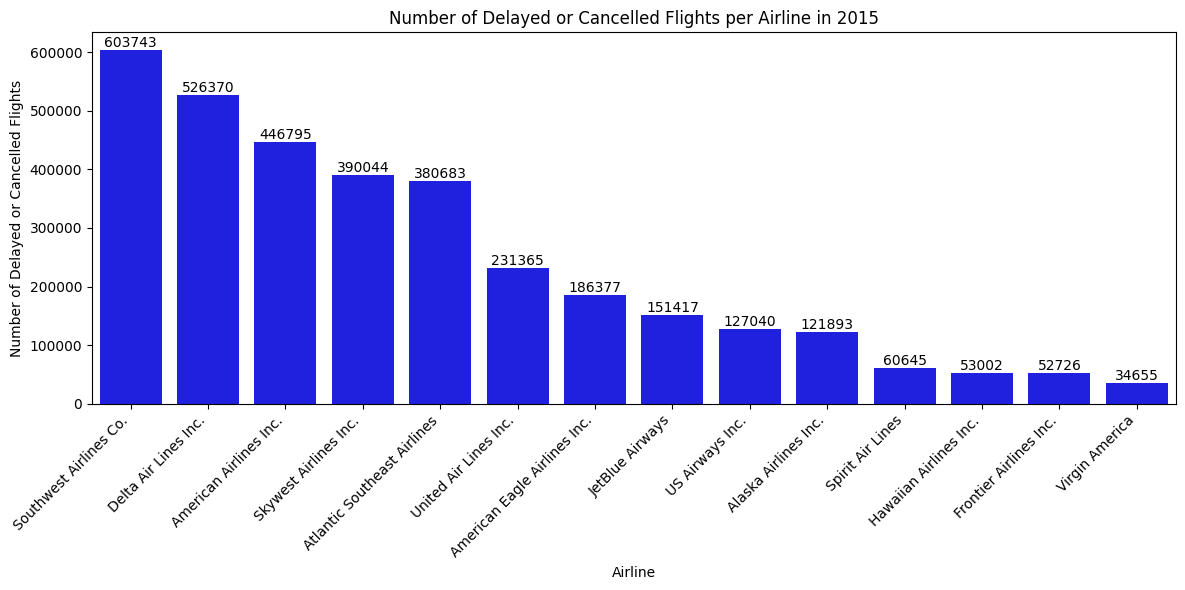

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the bar graph using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='AIRLINE', y='NUM_DELAYED_OR_CANCELLED', data=result_2015, color='Blue')

# Displaying the value on each bar
for index, value in enumerate(result_2015['NUM_DELAYED_OR_CANCELLED']):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.title('Number of Delayed or Cancelled Flights per Airline in 2015')
plt.xlabel('Airline')
plt.ylabel('Number of Delayed or Cancelled Flights')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#Q-2
Question: Which airports had the most flight cancellations?

In [ ]:
df1.head(2)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


#Filter the Data to include only Cancelled Flights

In [ ]:
#filter the dataframe to include only cancell flights
filter_Cancell=df1[df1['CANCELLED']==1]
filter_Cancell.head(2)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
32,2015,1,1,4,AS,136,N431AS,ANC,SEA,135,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
42,2015,1,1,4,AA,2459,N3BDAA,PHX,DFW,200,...,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN


In [ ]:
Cancell_flights_Origin=filter_Cancell['ORIGIN_AIRPORT'].value_counts()
#Convert the result to a DataFrame and reset the index
Cancell_flights_Origin_df=Cancell_flights_Origin.reset_index()
Cancell_flights_Origin_df.columns = ['IATA_CODE', 'NUM_CANCELLATIONS']
#print(a_df.head(10))
#Cancelled_flights_Origin = pd.merge(Cancell_flights_Origin_df, df2, on='IATA_CODE')
#Cancelled_flights_Origin.head(3)
Cancell_flights_Origin_df.head(5)

,IATA_CODE,NUM_CANCELLATIONS
0,ORD,8548
1,DFW,6254
2,LGA,4531
3,EWR,3110
4,BOS,2654


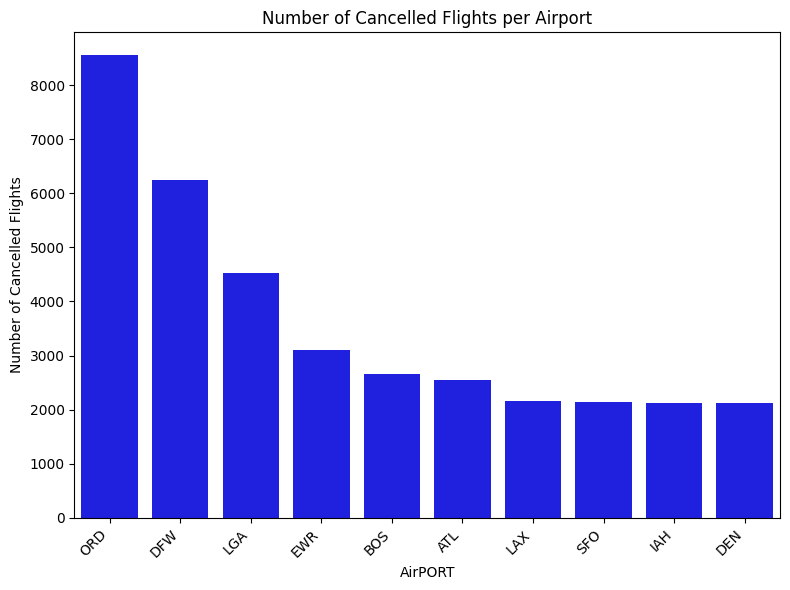

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the bar graph using seaborn
top_10_cancelled_airports = Cancell_flights_Origin_df.head(10)
plt.figure(figsize=(8, 6))
sns.barplot(x='IATA_CODE', y='NUM_CANCELLATIONS', data=top_10_cancelled_airports, color='Blue')

# Displaying the value on each bar
# for index, value in enumerate(Cancell_flights_Origin_df['NUM_CANCELLATIONS']):
#     plt.text(index, value, str(value), ha='center', va='bottom')

plt.title('Number of Cancelled Flights per Airport')
plt.xlabel('AirPORT')
plt.ylabel('Number of Cancelled Flights')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Q-03
Question: Are there any geographical patterns in flight delays? Do certain regions or airports experience more delays than others?

In [ ]:
# Convert all values in the ORIGIN_AIRPORT column to strings
df1['ORIGIN AIRPORT']=df1['ORIGIN_AIRPORT'].astype(str)
#Filter out rows that contains numeric values
df1=df1[df1['ORIGIN AIRPORT'].str.isalpha()]
df1['ORIGIN AIRPORT']

0          ANC
1          LAX
2          SFO
3          LAX
4          SEA
          ... 
5819074    LAX
5819075    JFK
5819076    JFK
5819077    MCO
5819078    JFK
Name: ORIGIN AIRPORT, Length: 5332914, dtype: object

#Departure Delay

In [ ]:
#Departure delay
df=df1.dropna(subset=['DEPARTURE_DELAY'])
departure_delay=df.groupby('ORIGIN_AIRPORT')['DEPARTURE_DELAY'].mean()
departure_delay_df = departure_delay.reset_index()
#departure_delay.head(2)
#df.isna().sum()
#df1['ORIGIN_AIRPORT']
#df1['DEPARTURE_DELAY']

In [ ]:
top_10_departure_delay = departure_delay_df.sort_values(by='DEPARTURE_DELAY', ascending=False).head(10)
merged_df_Depart_10 = top_10_departure_delay.merge(df2[['IATA_CODE', 'AIRPORT']], left_on='ORIGIN_AIRPORT', right_on='IATA_CODE', how='inner')

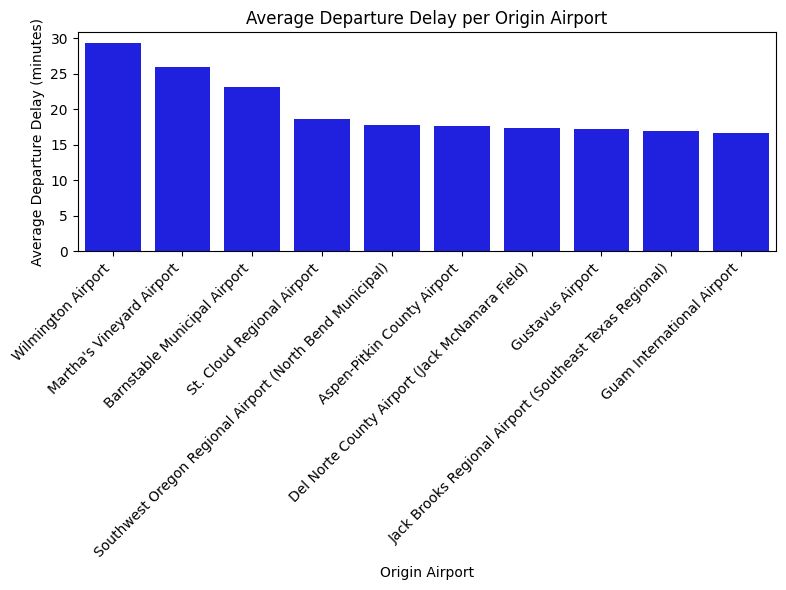

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the bar graph
plt.figure(figsize=(8, 6))
sns.barplot(x='AIRPORT', y='DEPARTURE_DELAY', data=merged_df_Depart_10, color='blue')
plt.title('Average Departure Delay per Origin Airport')
plt.xlabel('Origin Airport')
plt.ylabel('Average Departure Delay (minutes)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

#Arrival Delay

In [ ]:
#Arival_delay
arrival_delay=df1.groupby('DESTINATION_AIRPORT')['ARRIVAL_DELAY'].mean()
arrival_delay_df = arrival_delay.reset_index()
arrival_delay_df

,DESTINATION_AIRPORT,ARRIVAL_DELAY
0,ABE,5.799099
1,ABI,4.081385
2,ABQ,5.614678
3,ABR,-3.389650
4,ABY,8.681713
...,...,...
317,WRG,5.375767
318,WYS,4.193237
319,XNA,8.772090
320,YAK,0.371166


In [ ]:
top_10_arrival_delay = arrival_delay_df.sort_values(by='ARRIVAL_DELAY', ascending=False).head(10)
merged_df_arrival_10 = top_10_arrival_delay.merge(df2[['IATA_CODE', 'AIRPORT']], left_on='DESTINATION_AIRPORT', right_on='IATA_CODE', how='inner')

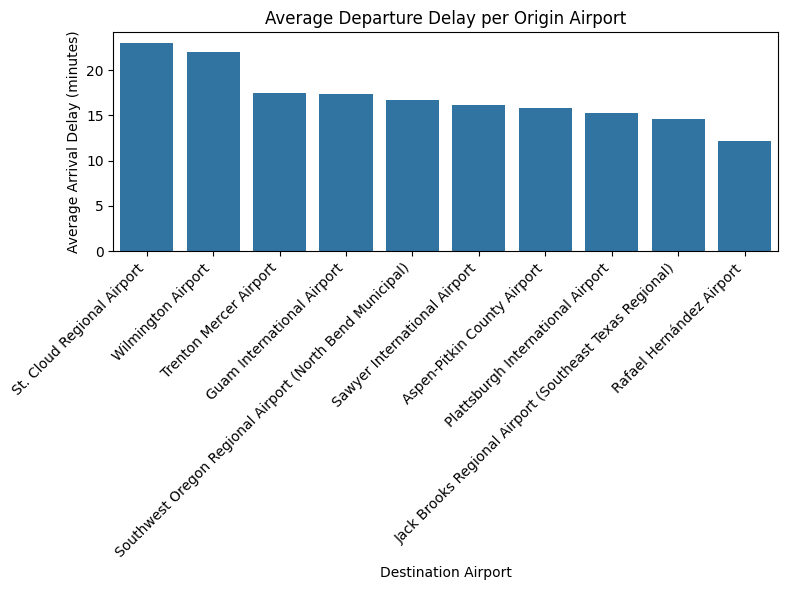

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='AIRPORT', y='ARRIVAL_DELAY', data=merged_df_arrival_10)
plt.title('Average Arrival Delay per Origin Airport')
plt.xlabel('Destination Airport')
plt.ylabel('Average Arrival Delay (minutes)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
#overall average delay
# avg_delay = (departure_delay + arrival_delay) / 2
# avg_delay

#Q-4
Question: What was the average flight delay for each day of the week? Are weekends or weekdays more prone to delays?

In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'flights_df'

# Calculate average delay for each day of the week
avg_delay_per_day = df1.groupby('DAY_OF_WEEK')[['DEPARTURE_DELAY', 'ARRIVAL_DELAY']].mean()

# Define weekdays and weekends
weekdays = [1, 2, 3, 4, 5]  # Monday to Friday
weekends = [6, 7]            # Saturday and Sunday

# Calculate average delay for weekdays and weekends
avg_delay_weekdays = avg_delay_per_day.loc[weekdays].mean()
avg_delay_weekends = avg_delay_per_day.loc[weekends].mean()

print("Average Delay for Weekdays (Monday to Friday):")
print(avg_delay_weekdays)

print("\nAverage Delay for Weekends (Saturday and Sunday):")
print(avg_delay_weekends)


Average Delay for Weekdays (Monday to Friday):
DEPARTURE_DELAY    10.053607
ARRIVAL_DELAY       5.421947
dtype: float64

Average Delay for Weekends (Saturday and Sunday):
DEPARTURE_DELAY    8.914207
ARRIVAL_DELAY      3.277497
dtype: float64


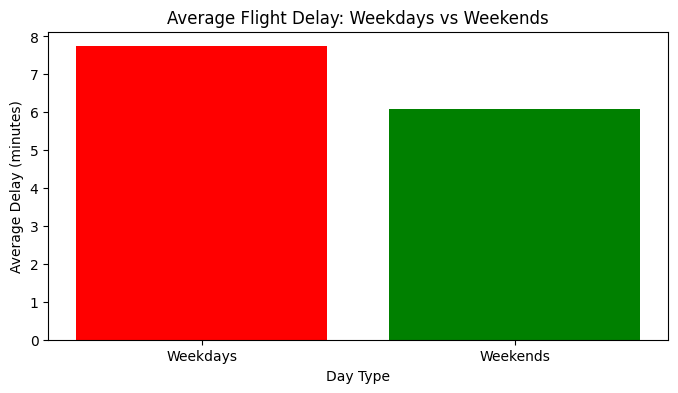

In [ ]:
plt.figure(figsize=(8, 4))
plt.bar(['Weekdays', 'Weekends'], [avg_delay_weekdays.mean(), avg_delay_weekends.mean()], color=['red', 'green'])
plt.title('Average Flight Delay: Weekdays vs Weekends')
plt.xlabel('Day Type')
plt.ylabel('Average Delay (minutes)')
plt.show()